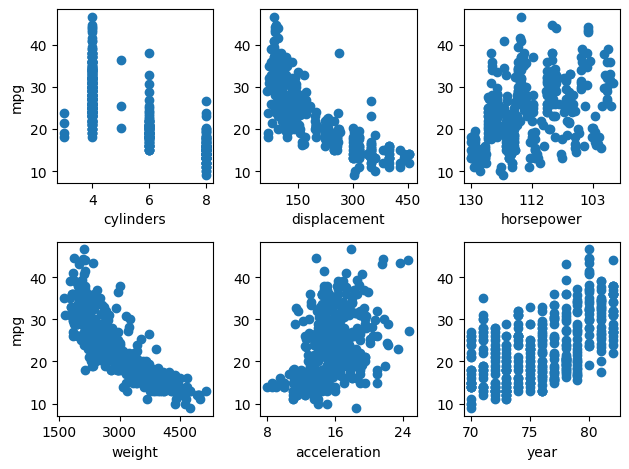

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Reads the dataset from disk
df = pd.read_csv('/Users/esten/Downloads/Auto.csv')

# Chooses the set of predictors we will use
predictors = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']

# Sets the target variable
target = 'mpg'

# Creates a plot with six subplots
fig, ax = plt.subplots(2, 3)
# Collapses the subplots to a single dimension
ax = ax.ravel()

# Iterates over each predictor
for i, predictor in enumerate(predictors):
    # Plots the given predictor against the target variable
    ax[i].scatter(df[predictor], df[target])
    # Ensures there are only 3 xticks
    ax[i].xaxis.set_major_locator(plt.MaxNLocator(3))
    # Labels the x-axis
    ax[i].set_xlabel(predictor)
    
    # Labels the y-axis for the first row
    if i % 3 == 0:
        ax[i].set_ylabel(target)

# Shows the plot
plt.tight_layout()
plt.show()

In [49]:
df = df[df['horsepower'] != '?']
df['horsepower'] = df['horsepower'].astype(int)
                                           
train = df.iloc[:int(len(df) * 0.8)].copy()
validation = df.iloc[int(len(df)*0.8):].copy()

In [50]:
import numpy as np

from itertools import chain, combinations
from sklearn.linear_model import LinearRegression

subsets = list(chain.from_iterable(combinations(predictors, r) \
                                   for r in range(len(predictors)+1)))

best = {'mse': float('inf'), 'subset': None}

for subset in subsets:
    if len(subset) == 0:
        continue
    
    model = LinearRegression()
    model.fit(train[list(subset)], train[target])
    predictions = model.predict(validation[list(subset)])
    mse = np.mean((predictions - validation[target]) ** 2)
    
    if mse < best['mse']:
        best = {'mse': mse, 'subset': subset}
        
print(f'MSE: {best["mse"]:.2f}, predictors: {best["subset"]}')

MSE: 29.68, predictors: ('cylinders', 'displacement', 'horsepower', 'weight', 'year')


In [74]:
from typing import List


def fit_and_evaluate(train: pd.DataFrame, validation: pd.DataFrame, 
                     predictors: List[str], target: str):
    model = LinearRegression()
    model.fit(train[predictors], train[target])
    
    train_predictions = model.predict(train[predictors])
    validation_predictions = model.predict(validation[predictors])
    
    return np.mean((train_predictions - train[target]) ** 2), \
           np.mean((validation_predictions - validation[target]) ** 2)

predictors = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
target = 'mpg'

train['intercept'] = 1
validation['intercept'] = 1
train_mse, validation_mse = fit_and_evaluate(train, validation,
                                             predictors=['intercept'], 
                                             target=target)
print(f'[]: {validation_mse:.2f} ({train_mse:.2f})')

chosen_predictors = []

while len(chosen_predictors) < len(predictors):
    best_predictor = {'train_mse': None, 'validation_mse': float('inf'), 
                      'predictor': None}
    
    for predictor in set(predictors) - set(chosen_predictors):
        train_mse, validation_mse = fit_and_evaluate(train, validation, 
                                    predictors=chosen_predictors + [predictor], 
                                    target=target)

        
        # Compare model with previous best
        if validation_mse < best_predictor['validation_mse']:
            best_predictor = {'train_mse': train_mse, 'validation_mse': validation_mse, 'predictor': predictor}

    chosen_predictors.append(best_predictor['predictor'])
            
    print(f'{chosen_predictors}: {best_predictor["validation_mse"]:.2f} ({best_predictor["train_mse"]:.2f})')

[]: 146.47 (44.74)
['weight']: 61.18 (11.02)
['weight', 'year']: 29.84 (8.31)
['weight', 'year', 'horsepower']: 29.85 (8.31)
['weight', 'year', 'horsepower', 'cylinders']: 29.87 (8.25)
['weight', 'year', 'horsepower', 'cylinders', 'displacement']: 29.68 (8.24)
['weight', 'year', 'horsepower', 'cylinders', 'displacement', 'acceleration']: 30.29 (8.21)


In [47]:
predictors

['acceleration']